<a href="https://colab.research.google.com/github/jeowf/analises-intro-python/blob/master/An%C3%A1lise%20Enem/An%C3%A1lise%20de%20Notas/Enem_Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Primeiramente, importamos as bibliotecas que iremos utilizar
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Agora, lemos o dataset e tentamos exibi-lo para ver se a leitura foi realizada corretamente
Dados_Enem = pd.read_csv('DadosEnemRN_Filtrados.csv')
Dados_Enem.head()

,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,1,461.673184,532.437669,492.285892,498.521137
1,1,453.600000,678.900000,598.100000,391.400000
2,1,390.500000,542.600000,446.700000,453.800000
3,1,506.200000,590.800000,532.800000,392.400000
4,1,522.400000,640.400000,535.500000,612.500000


In [0]:
#Agora, criamos arrays para armazenar os índices de cada tipo de escola (publica, particular e não declarado)
Tipos_Escola = Dados_Enem['TP_ESCOLA']
count = 0
indicesPub = []
indicesPart = []
indicesNDec = []
for i in Tipos_Escola:
  if i == 1:
    indicesNDec.append(count)
  elif i == 2:
    indicesPub.append(count)
  else:
    indicesPart.append(count)
  count+=1
# Notas da pública   ----------------------------
Notas_Natureza_Pub = Dados_Enem['NU_NOTA_CN'][indicesPub]
Notas_Humanas_Pub = Dados_Enem['NU_NOTA_CH'][indicesPub]
Notas_Linguagens_Pub = Dados_Enem['NU_NOTA_LC'][indicesPub]
Notas_Matematcica_Pub = Dados_Enem['NU_NOTA_MT'][indicesPub]
NotasGerais_Pub = pd.concat([Notas_Natureza_Pub, Notas_Humanas_Pub, Notas_Linguagens_Pub, Notas_Matematcica_Pub ], axis=1)
# Notas Particulares ----------------------------
Notas_Natureza_NP = Dados_Enem['NU_NOTA_CN'][indicesPart]
Notas_Humanas_NP = Dados_Enem['NU_NOTA_CH'][indicesPart]
Notas_Linguagens_NP = Dados_Enem['NU_NOTA_LC'][indicesPart]
Notas_Matematcica_NP = Dados_Enem['NU_NOTA_MT'][indicesPart]
NotasGerais_NP = pd.concat([Notas_Natureza_NP, Notas_Humanas_NP, Notas_Linguagens_NP, Notas_Matematcica_NP ], axis=1)
# Notas Não Declarados --------------------------
Notas_Natureza_NDec = Dados_Enem['NU_NOTA_CN'][indicesNDec]
Notas_Humanas_NDec = Dados_Enem['NU_NOTA_CH'][indicesNDec]
Notas_Linguagens_NDec = Dados_Enem['NU_NOTA_LC'][indicesNDec]
Notas_Matematica_NDec = Dados_Enem['NU_NOTA_MT'][indicesNDec]
NotasGerais_NDec = pd.concat([Notas_Natureza_NDec, Notas_Humanas_NDec, Notas_Linguagens_NDec, Notas_Matematica_NDec ], axis=1)
    

In [0]:
# Criando a função que irá contar quantos aluos tiraram acima de 500 em cada prova
def contador(Lista):
    count = 0
    for i in Lista:
        if i >= 500:
            count+=1
    return count

In [13]:
# Guardando as notas acima de 500 nas escolas públicas
Notas_P500_Pub = []
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_CN']))
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_CH']))
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_LC']))
Notas_P500_Pub.append(contador(NotasGerais_Pub['NU_NOTA_MT']))
Notas_P500_Pub

[2889, 10951, 5751, 5276]

In [14]:
# Guardando as notas acima de 500 nas escolas particulares
Notas_P500_NP = []
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_CN']))
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_CH']))
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_LC']))
Notas_P500_NP.append(contador(NotasGerais_NP['NU_NOTA_MT']))
Notas_P500_NP

[2941, 4213, 3828, 3482]

In [15]:
# Guardando as notas acima de 500 nas escolas não declaradas
Notas_P500_NDec = []
Notas_P500_NDec.append(contador(NotasGerais_NDec['NU_NOTA_CN']))
Notas_P500_NDec.append(contador(NotasGerais_NDec['NU_NOTA_CH']))
Notas_P500_NDec.append(contador(NotasGerais_NDec['NU_NOTA_LC']))
Notas_P500_NDec.append(contador(NotasGerais_NDec['NU_NOTA_MT']))
Notas_P500_NDec

[29563, 85560, 49703, 41694]

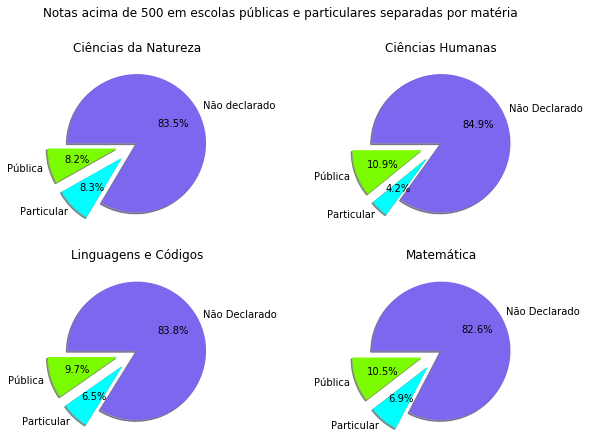

In [32]:
#Plotando o gráfico de cada prova individualmente através de subplots
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10,7))
fig.suptitle('Notas acima de 500 em escolas públicas e particulares separadas por matéria')
ax1[0].pie([Notas_P500_Pub[0], Notas_P500_NP[0], Notas_P500_NDec[0]], 
        labels=['Pública', 'Particular', 'Não declarado'], startangle=180, autopct='%1.1f%%', shadow=True, explode=[0.3,0.3,0], colors=['lawngreen', 'aqua', 'mediumslateblue'])
ax1[0].set_title('Ciências da Natureza')
ax1[1].pie([Notas_P500_Pub[1], Notas_P500_NP[1], Notas_P500_NDec[1]], 
        labels=['Pública', 'Particular', 'Não Declarado'], startangle=180, autopct='%1.1f%%', shadow=True, explode=[0.3,0.3,0], colors=['lawngreen', 'aqua', 'mediumslateblue'])
ax1[1].set_title('Ciências Humanas')
ax2[0].pie([Notas_P500_Pub[2], Notas_P500_NP[2], Notas_P500_NDec[2]], 
        labels=['Pública', 'Particular', 'Não Declarado'], startangle=180, autopct='%1.1f%%', shadow=True, explode=[0.3,0.3,0], colors=['lawngreen', 'aqua', 'mediumslateblue'])
ax2[0].set_title('Linguagens e Códigos')
ax2[1].pie([Notas_P500_Pub[3], Notas_P500_NP[3], Notas_P500_NDec[3]], 
        labels=['Pública', 'Particular', 'Não Declarado'], startangle=180, autopct='%1.1f%%', shadow=True, explode=[0.3,0.3,0], colors=['lawngreen', 'aqua', 'mediumslateblue'])
ax2[1].set_title('Matemática')
plt.show()